# Data Exploration and Visualization
by Istam Kulliev

# Introduction
Ford GoBike is a regional public bicycle sharing system in USA.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. 

The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

# Investigation Overview

In this investigation, I want to look at to the customer behaviour characteristics. 

I focused on time, age, gender, duration and user type to analyze and understand the usage of bike.

Dataset Overview
The forgobike trip data are more 1,83 thousands rides and 16 variables that happend 2019 in february.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

# Part II Gathering and Assessing Data

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
df.shape

(183412, 16)

In [4]:
len(df)

183412

In [5]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# Remove rows that does not have gender value
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

The database is clean. Their number decreased from about 183,000 to 175,000.

Quality issues

Start time and end time are objects not a timestamps

user type, gender and bike_share_for_all_trip can be set to category

bike id, start_station_id, end_station_id can be set to object

In [9]:
print(df['start_time'])

0         2019-02-28 17:32:10.1450
1         2019-02-28 18:53:21.7890
2         2019-02-28 12:13:13.2180
3         2019-02-28 17:54:26.0100
4         2019-02-28 23:54:18.5490
                    ...           
183407    2019-02-01 00:04:49.7240
183408    2019-02-01 00:05:34.7440
183409    2019-02-01 00:06:05.5490
183410    2019-02-01 00:05:34.3600
183411    2019-02-01 00:00:20.6360
Name: start_time, Length: 183412, dtype: object


In [10]:
df.duplicated().sum()

0

In [11]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [14]:
df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

# Part III - Cleaning Data

In [15]:
# make a copy of the dataframe 
# issue 1: fix multiple fields that aren't in the correct dtype

df2 = df.copy()
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

df2['start_station_id'] = df2['start_station_id'].astype('str')
df2['end_station_id'] = df2['end_station_id'].astype('str')
df2['bike_id'] = df2['bike_id'].astype('str')

df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [16]:
# 2 For the duration of the trip, we will add new columns for the start date of the trip in yyyy-mm-dd format, the start time of the day, the day of the week and the month in minutes in time format

df2['duration_minute'] = df2['duration_sec']/60
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [18]:
# A new column will be added that calculates the age of cyclists from “member_birth_year”
# substract the birth year from the current year
df2['member_age'] = 2021 - df2['member_birth_year']
df2.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,36.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,20.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,29.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,34.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,41.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,143.000000


In [19]:
df2['start_date'] = df2.start_time.dt.strftime('%Y-%m-%d')
df2['start_hourofday'] = df2.start_time.dt.strftime('%H')
df2['start_dayofweek'] = df2.start_time.dt.strftime('%A')
df2['start_month'] = df2.start_time.dt.strftime('%B')
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,member_age,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,37.0,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,708.683333,NaN,2019-02-28,18,Thursday,February


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

# How is your data set structured?

The initial combined data included approximately 174,295 individual travel records with 16 columns. Variables can be divided into three major categories:

1 Travel duration:
a) continuity_sec.,
b) start time;
c) expiration time.

    2. Station information:
-start_station_id,
-start_station_name,
-start_station_latitude,
-start_station_longitude,
-end_station_id,
-end_station_name,
-end_station_latitude,
-end_station_longitude.

    3. Information about members:
-velosiped_id,
-user_type,
-a'zo_birth_year,
-member_gender,
-bike_share_for_all_trip

Features / variables that help research and analysis:

    Travel information: duration_minute, start_date, start_hourofday, start_dayof week, start_month
    member: member_age

The following analysis was performed in the database analysis.
Type of users reviewed.

Based on the Member_gender analysis, key customers and members were surveyed. As a result, it was determined that the main customers were men.

It was also analyzed on the basis of duration_sec which categories of customers have cycled for a long time.
In addition, an analysis of the age of the clients was performed.

# For type of users 

(0.0, 100.0)

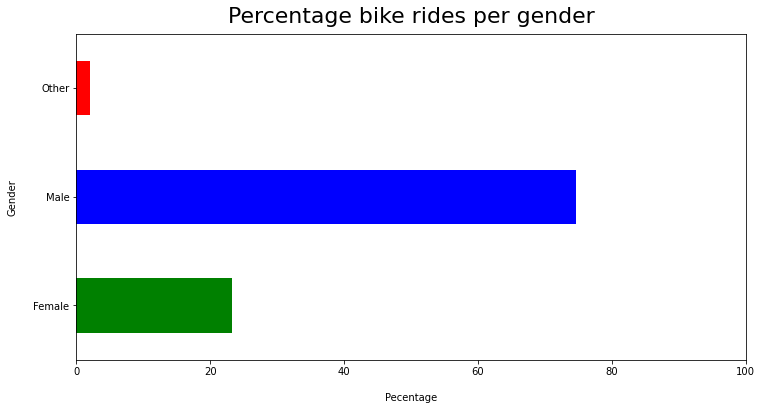

In [21]:
gender_trips = df2.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100

colors = ['green', 'blue', 'red']
gender_trips['perc'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('Gender', labelpad=16)
plt.xlabel('Pecentage', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

In [22]:
# Keep records below 60, it automatically removes null values
df2 = df2.query('member_age<=60')

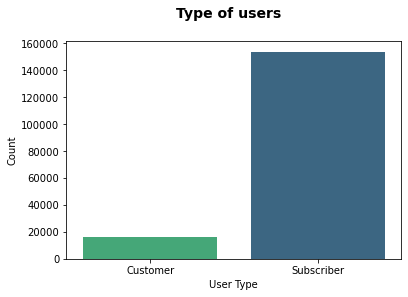

In [23]:
 sb.countplot(data=df2, x='user_type', palette='viridis_r');
plt.xlabel('User Type');
plt.ylabel('Count');
plt.suptitle('Type of users', y=1.0, fontsize=14, fontweight='semibold');

# Classification of users by gender

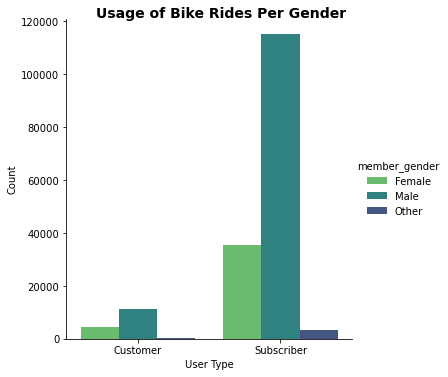

In [26]:
sb.catplot(data=df2, x='user_type', hue='member_gender', kind='count',  palette='viridis_r')

plt.xlabel('User Type');
plt.ylabel('Count');
plt.suptitle('Usage of Bike Rides Per Gender', y=1.0, fontsize=14, fontweight='bold');

# Visualization during the days of the per week

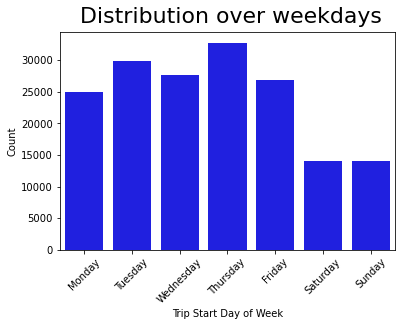

In [25]:
# trip distribution over weekdays

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df2['start_dayofweek'] = df2['start_dayofweek'].astype(weekdaycat)
plt.xticks(rotation=45);
sb.countplot(data=df2, x='start_dayofweek', color="b");
plt.title(' Distribution over weekdays', fontsize=22, y=1.015)
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

The bike share system is mainly used during weekdays, with Tuesday and Thursday as the most popular days for bike rides. 

# Visualization during the days of the week

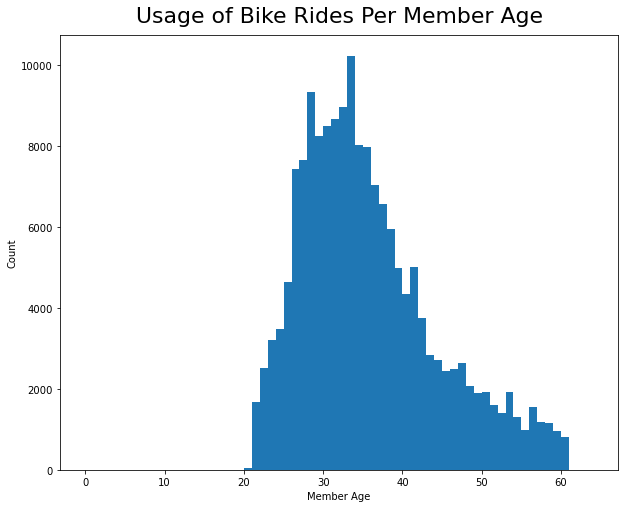

In [31]:
# 3 plot the distribution of members' age, visually examine for some outliers over 100 yrs old
plt.figure(figsize=[10, 8])
bins = np.arange(0, df2['member_age'].max()+5, 1)
plt.hist(df2['member_age'].dropna(), bins=bins);
plt.title('Usage of Bike Rides Per Member Age', fontsize=22, y=1.015)
plt.xlabel('Member Age');
plt.ylabel('Count');

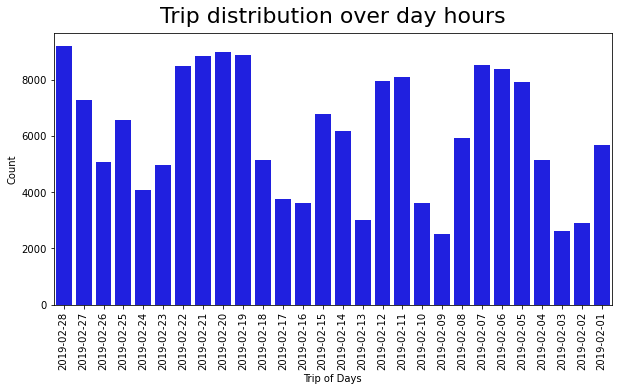

In [32]:
# trip distribution over day 

plt.rcParams['figure.figsize'] = 10, 5

sb.countplot(data=df2, x='start_date', color="b")
plt.title('Trip distribution over day', fontsize=22, y=1.015)
plt.xticks(rotation=90);
plt.xlabel('Trip of Days');
plt.ylabel('Count');

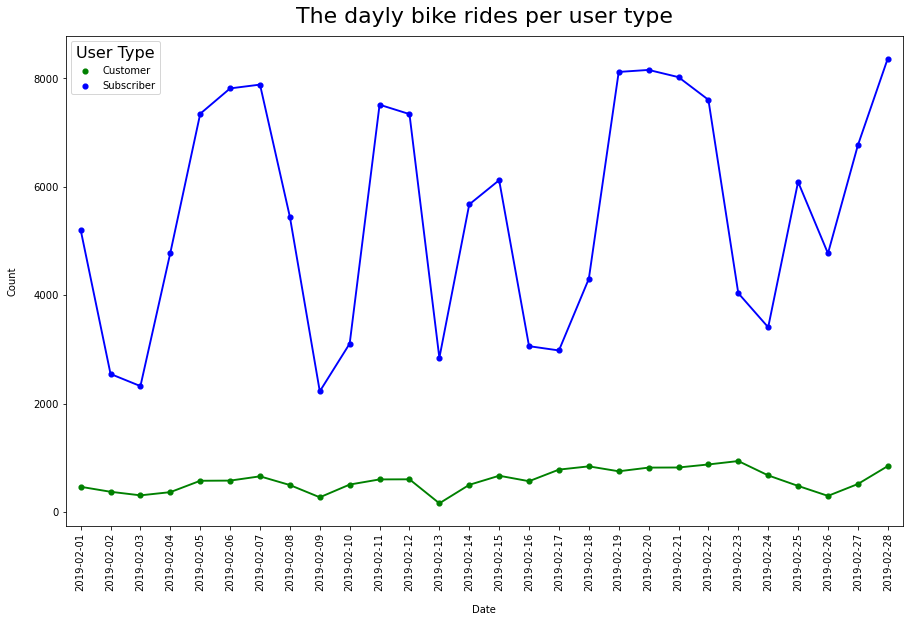

In [29]:
# trip distribution over day hours

user_type_count = df2.groupby(["start_date", "user_type"]).size().reset_index()

plt.figure(figsize=(15,9))
palette = {'Subscriber':'blue', 'Customer':'green'}
axis = sb.pointplot(x='start_date', y=0, hue='user_type', palette=palette, scale=.7, data=user_type_count)
plt.title('The dayly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=14)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('User Type',prop={'size':16})
axis = plt.gca()
plt.xticks(rotation=90);

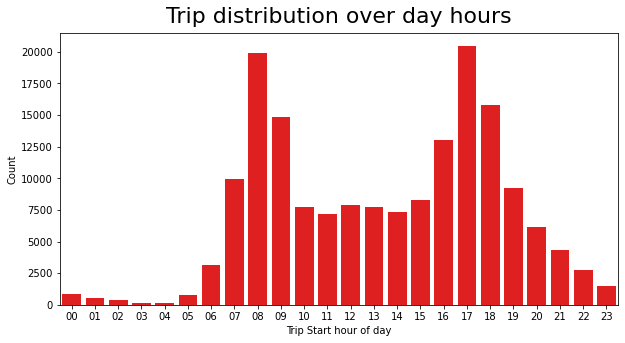

In [33]:
# trip distribution over hour of day

plt.rcParams['figure.figsize'] = 10, 5
sb.countplot(x='start_hourofday', data=df2.sort_values(by=['start_hourofday']), color="r")
plt.title('Trip distribution over day hours', fontsize=22, y=1.015)
plt.xlabel('Trip Start hour of day');
plt.ylabel('Count');

Based on daily data, it can be seen that the main user time is between 07-09 and 16-18.

In [34]:
# A new column will be added that calculates the age of cyclists from “member_birth_year”
data1 = df2['member_age']
print(data1)

0         37.0
2         49.0
3         32.0
4         47.0
6         38.0
          ... 
183407    25.0
183408    37.0
183409    31.0
183410    33.0
183411    32.0
Name: member_age, Length: 170186, dtype: float64


In [35]:
df2.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id             0
start_station_name         194
start_station_latitude       0
start_station_longitude      0
end_station_id               0
end_station_name           194
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
duration_minute              0
member_age                   0
start_date                   0
start_hourofday              0
start_dayofweek              0
start_month                  0
dtype: int64

In [36]:
#conditions  = [
#              (df2['member_age']<=10),
#              (df2['member_age']>10) & (df2['member_age']<=20),
#               (df2['member_age']>20) & (df2['member_age']<=30),
#               (df2['member_age']>30) & (df2['member_age']<=40),
#               (df2['member_age']>40) & (df2['member_age']<=50),
#               (df2['member_age']>50) & (df2['member_age']<=60),
#               (df2['member_age']>60)
#                ]
#        choices = ['unde', 'asd','sd','ser','df', 'as', 'qwass']
#        my_order[age_category]= np.select(conditions , choices)
df2['age_bins'] = df2['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 61' if 50<x<=60
                                                  else '61 - 100' if 61<x<=100
                                                           else x)

In [37]:
subscriber_age_df  = df2[df2['user_type'] == 'Subscriber'].groupby(['start_dayofweek','age_bins'  ]).agg({'bike_id':'count'}).reset_index()

In [38]:
subscriber_age_df .sample()

,start_dayofweek,age_bins,bike_id
32,Sunday,31 - 40,4520


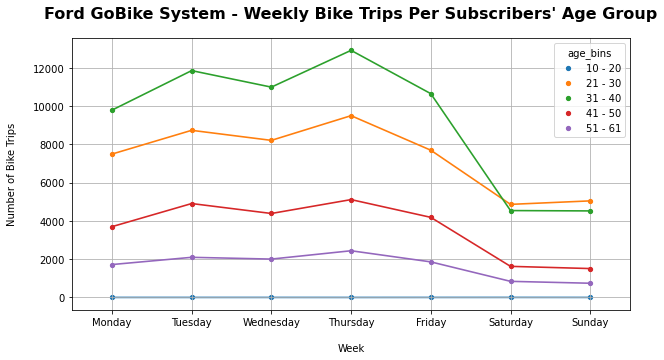

In [39]:

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.pointplot(data = subscriber_age_df, x='start_dayofweek', y='bike_id', hue='age_bins', scale=.6, order = weekday);
plt.xlabel('Week', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Weekly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');
plt.grid()

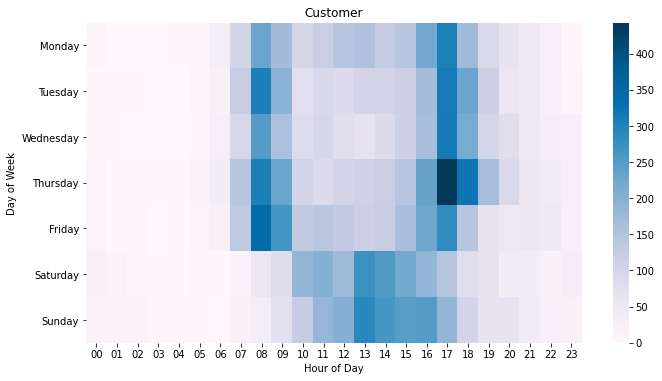

In [38]:
plt.figure(figsize=[10, 10]);

plt.subplot(2, 1, 1)
customers = df2.query('user_type == "Customer"')
cus_count = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
cus_count = cus_count.reset_index(name='count')
cus_count = cus_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(cus_count, cmap='PuBu');
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

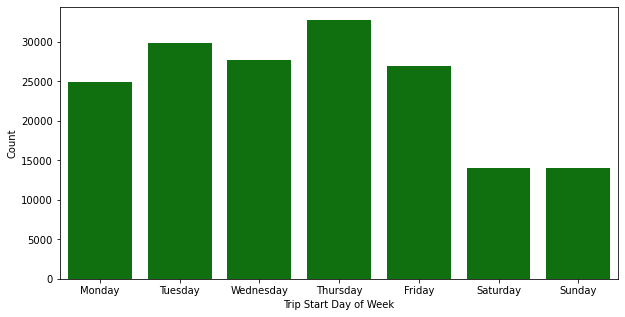

In [39]:
# trip distribution over weekdays

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df2['start_dayofweek'] = df2['start_dayofweek'].astype(weekdaycat)
sb.countplot(data=df2, x='start_dayofweek', color="g");
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

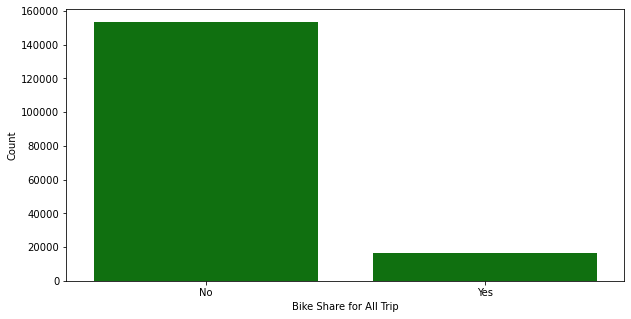

In [40]:
sb.countplot(data=df2, x='bike_share_for_all_trip', color="g");
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

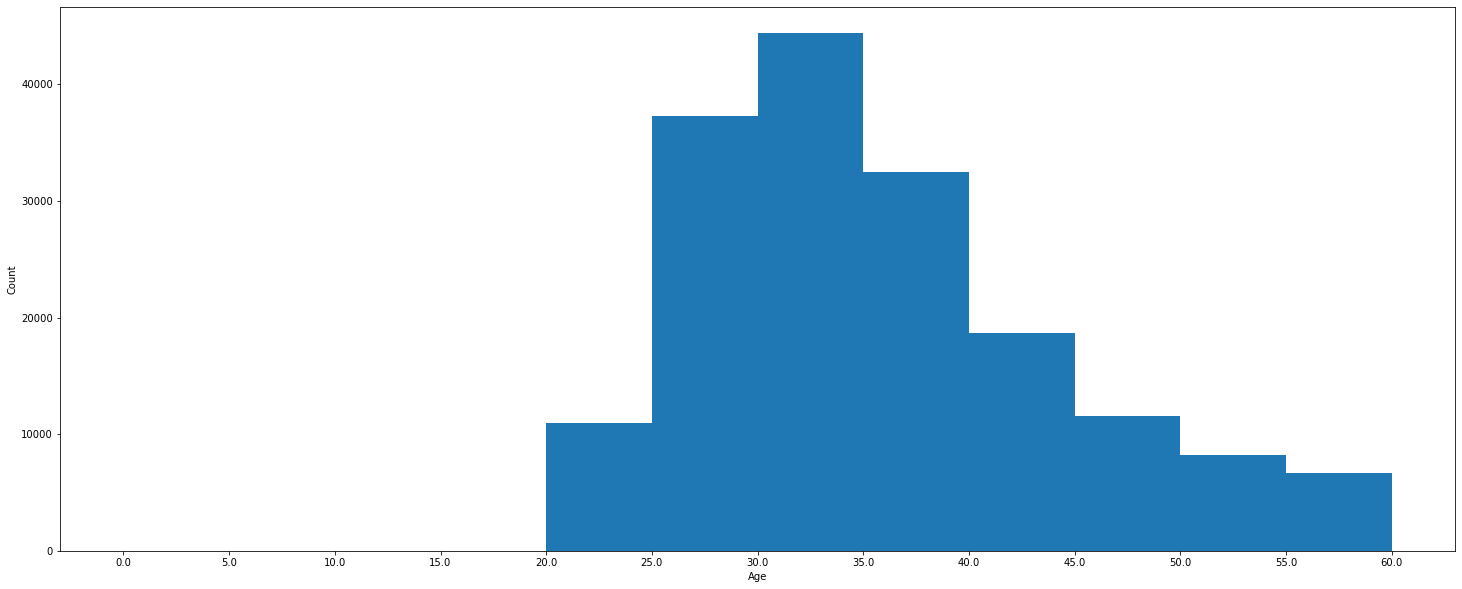

In [41]:
plt.figure(figsize=[25, 10]);
bins = np.arange(0, df2['member_age'].max()+5, 5)
plt.hist(data=df2, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Age');
plt.ylabel('Count');

# Trip duration distribution to plot next.

<AxesSubplot:xlabel='duration_minute', ylabel='member_age'>

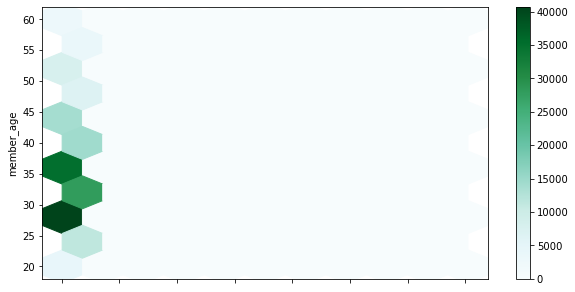

In [42]:
plt.rcParams['figure.figsize'] = 10, 5
df2.plot.hexbin(x='duration_minute', y='member_age', reduce_C_function=np.min, gridsize=10)

In [43]:
df2['duration_minute'].describe(percentiles=[.99])

count    170186.000000
mean         11.721337
std          27.666547
min           1.016667
50%           8.483333
99%          53.033333
max        1409.133333
Name: duration_minute, dtype: float64

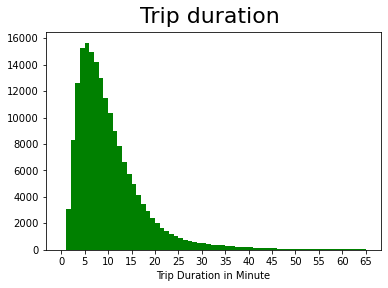

In [22]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df2, x='duration_minute', bins=bins, color="g");
plt.title('Trip duration ', fontsize=22, y=1.015)
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

 Looks like 99% of the trips were less than 1 hour long with most of them fell between 4 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [45]:
# filter out outlier trip records where the duration was very long

df2 = df2.query('duration_minute <= 61')
df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168872 entries, 4 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             168872 non-null  int64         
 1   start_time               168872 non-null  datetime64[ns]
 2   end_time                 168872 non-null  datetime64[ns]
 3   start_station_id         168872 non-null  object        
 4   start_station_name       168681 non-null  object        
 5   start_station_latitude   168872 non-null  float64       
 6   start_station_longitude  168872 non-null  float64       
 7   end_station_id           168872 non-null  object        
 8   end_station_name         168681 non-null  object        
 9   end_station_latitude     168872 non-null  float64       
 10  end_station_longitude    168872 non-null  float64       
 11  bike_id                  168872 non-null  object        
 12  user_type       

In [46]:
# save the clean data to a .csv file
df2.to_csv('fordgobike_trips_2019_clean.csv', index=False)

Text(0, 0.5, 'Trip Duration in Minute')

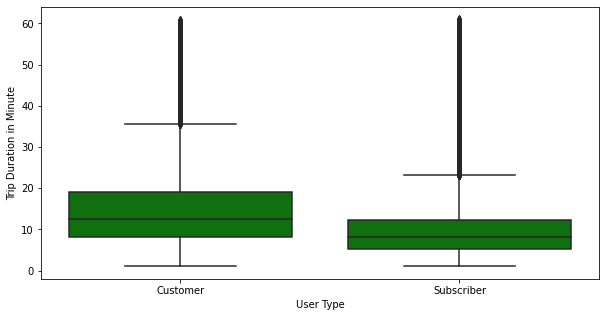

In [47]:
# How does the trip duration distribution between customers and subscribers?
sb.boxplot(data=df2, x='user_type', y='duration_minute', color="g");
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

How does the trip duration distribution vary by gender?

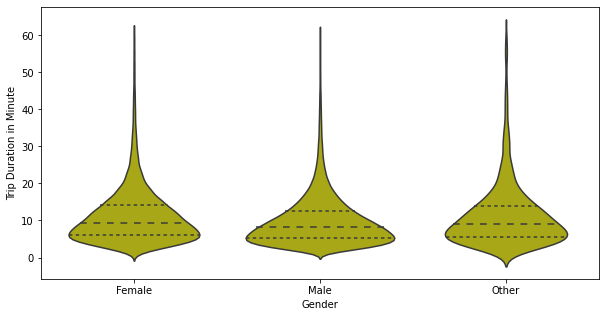

In [48]:
sb.violinplot(data=df2, x='member_gender', y='duration_minute', color="y", inner='quartile');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

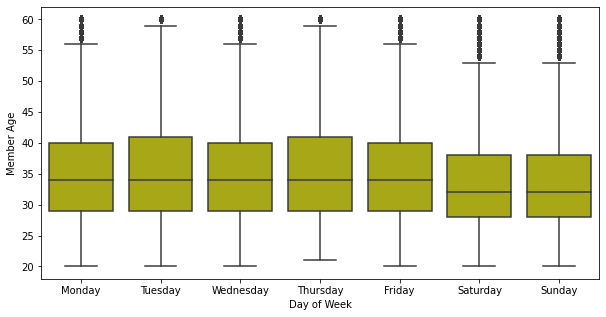

In [49]:
sb.boxplot(data=df2, x='start_dayofweek', y='member_age', color="y");
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

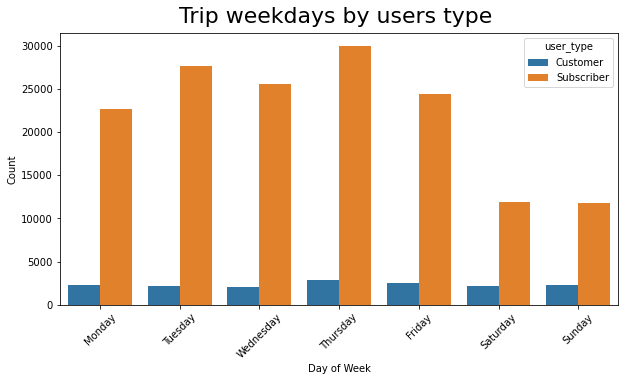

In [48]:
sb.countplot(data=df2, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.title('Trip weekdays by users type ', fontsize=22, y=1.015) 
plt.ylabel('Count');
plt.xticks(rotation=45);

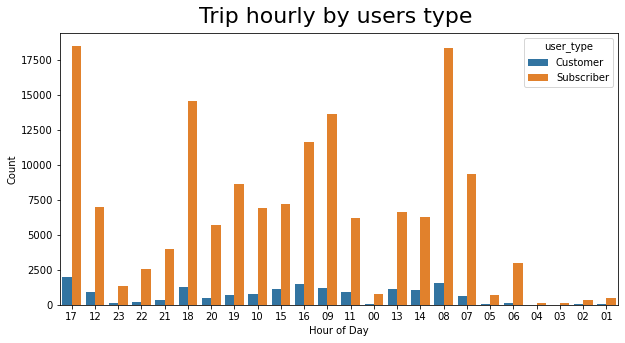

In [47]:
sb.countplot(data=df2, x='start_hourofday', hue='user_type');
plt.title('Trip hourly by users type ', fontsize=22, y=1.015)
plt.xlabel('Hour of Day');
plt.ylabel('Count');

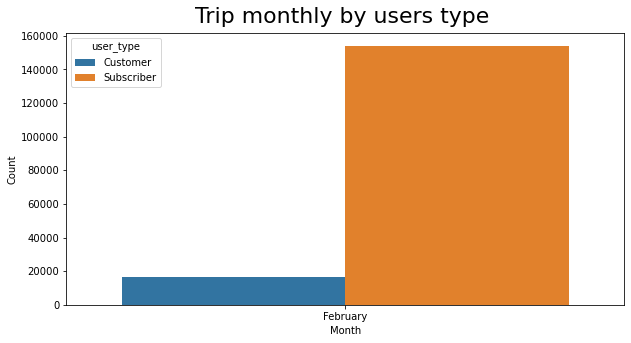

In [46]:
sb.countplot(data=df2, x='start_month', hue='user_type');
plt.xticks(rotation=0);
plt.title('Trip monthly by users type ', fontsize=22, y=1.015)
plt.xlabel('Month');
plt.ylabel('Count');

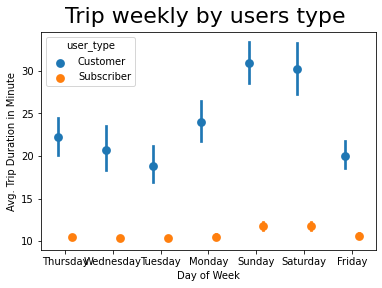

In [23]:
sb.pointplot(data=df2, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.title('Trip weekly by users type ', fontsize=22, y=1.015)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


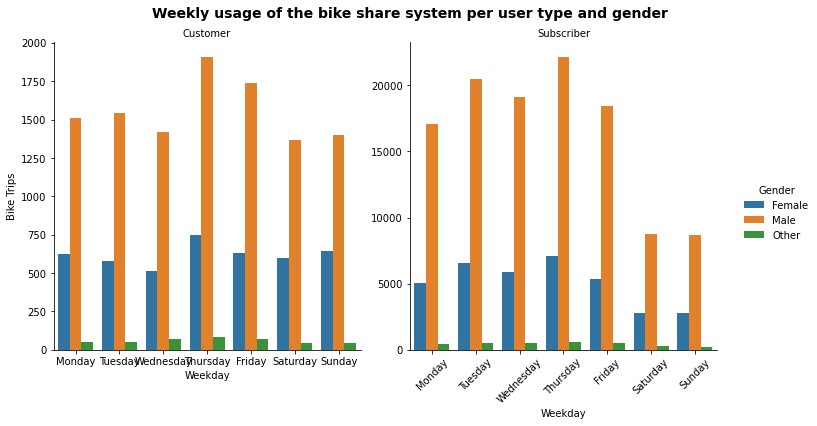

In [54]:
# weekly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df2, x='start_dayofweek', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
plt.xticks(rotation=45);

In [55]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_minute']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_dayofweek', 'start_hourofday', 'member_gender', 'user_type']      

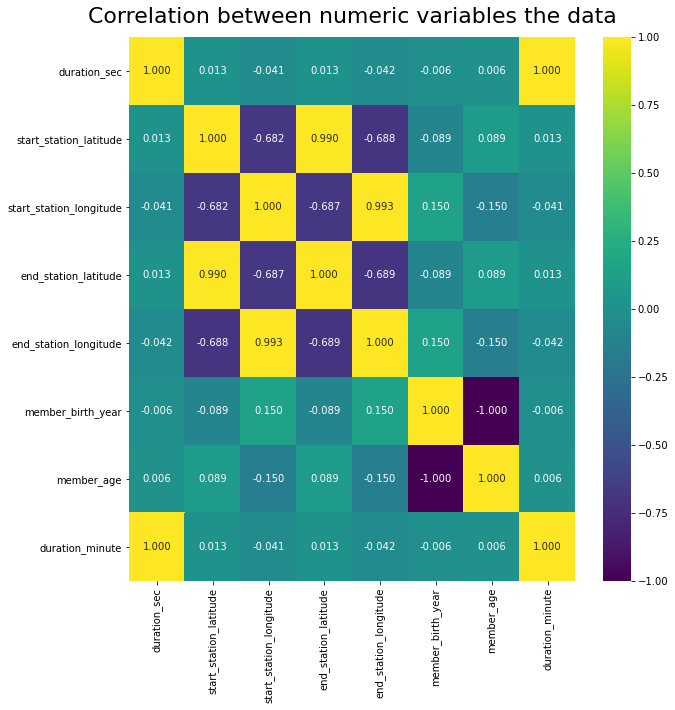

In [43]:
# correlation plot
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_minute']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_dayofweek', 'start_hourofday', 'member_gender', 'user_type']           
plt.figure(figsize = [10, 10])
plt.title('Correlation between numeric variables the data', fontsize=22, y=1.015)
sb.heatmap(df2[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'viridis', center = 0);

Based on the analysis, the correlation coefficients indicate that there may be a correlation between the following pairs: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude) and (end_station_latitude, end_station_longitude). However, there is no evidence in the database to support this.

In [ ]:
!jupyter nbconvert Communicate_data_findings.ipynb --to slides --post serve --no-input --no-prompt